# Post & pre pruning in D-tree 

post-pruning

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
load_data = load_iris()
load_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
data = pd.DataFrame(load_data.data)
data.columns = load_data.feature_names
y = load_data.target

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
print(f'sample size of X: {data.shape[0]}')
print(f'sample size of y: {y.shape[0]}')
X = data

sample size of X: 150
sample size of y: 150


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtc = DecisionTreeClassifier()

In [12]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
from sklearn import tree

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

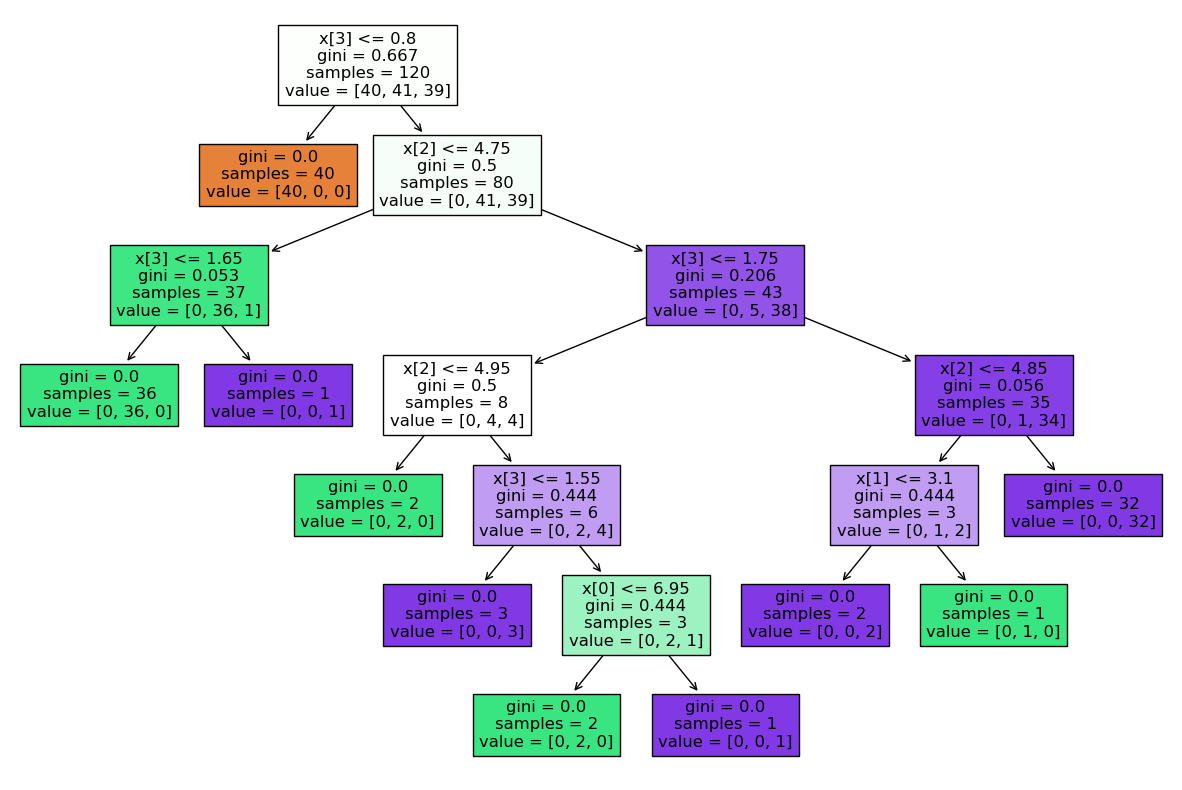

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [22]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [23]:
dtc.fit(X_train,y_train)
y_ = dtc.predict(X_test)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]')]

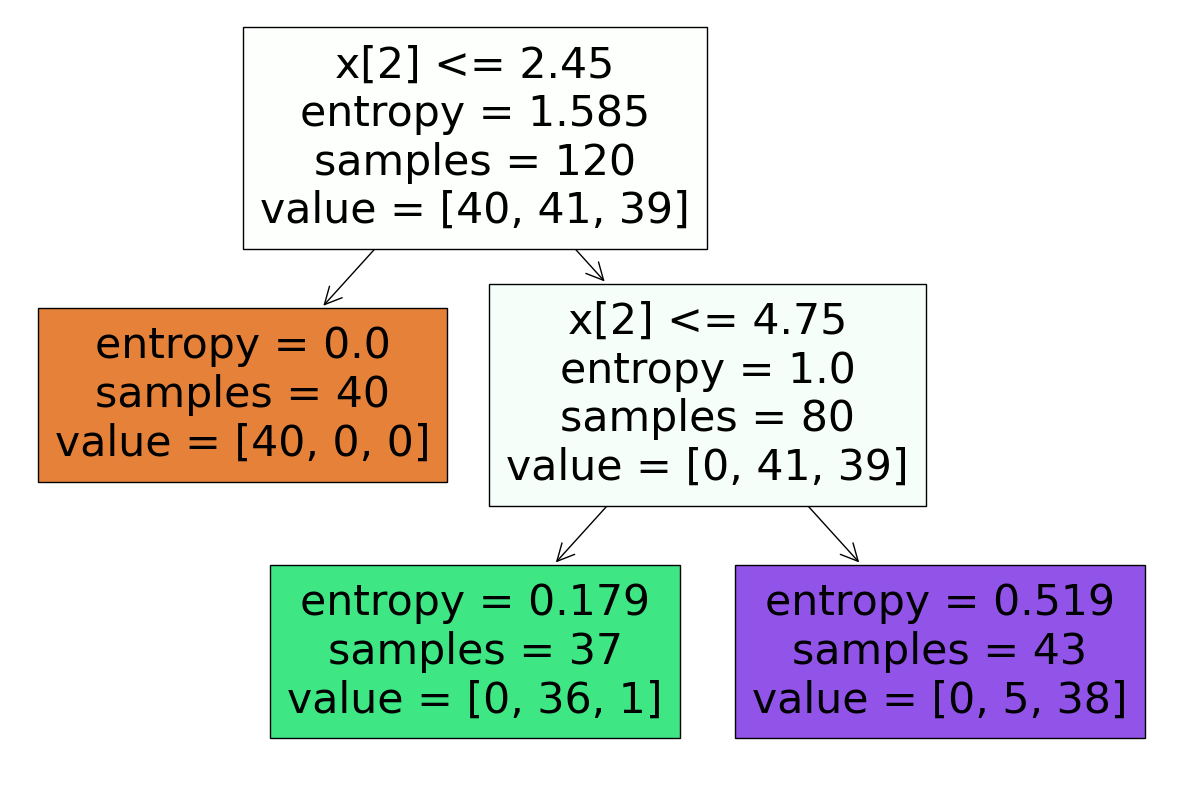

In [24]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
score = accuracy_score(y_test,y_)
clr = classification_report(y_test,y_)
print(f'accuracy score of testing model = {score}')
print(f'Classification report of testing model = {clr}')

accuracy score of testing model = 0.9666666666666667
Classification report of testing model =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# pre-pruning

In [40]:
params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
}


# h-parameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
model = DecisionTreeClassifier(max_depth=2) 
cv = GridSearchCV(model,param_grid=params,cv=5,scoring='accuracy')

In [43]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [44]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [54]:
y_ = cv.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report

# Model performance

In [56]:
score = accuracy_score(y_test,y_)
clr = classification_report(y_test,y_)
print(f'accuracy score of testing model = {score}')
print(f'Classification report of testing model = {clr}')

accuracy score of testing model = 0.9666666666666667
Classification report of testing model =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

